# <span style="color:#4174B9">Baseball Statistics</span>
## <span style="color:#17A589">_Team and player analysis_</span>

Baseball statistics play an important role in evaluating a player's and/or team's progress. Let's first analyze teams stats by asking the folloing questions:

1. Which performance metrics are highly valued by team managers?
2. Which performance metrics are highly correlated?
3. Which metrics are correlated with wins?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
sns.set(style="white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
teams = pd.read_csv('./baseballdatabank-master/core/Teams.csv', sep=',', keep_default_na=False, na_values=[''])
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2805 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [9]:
salaries = pd.read_csv('./baseballdatabank-master/core/Salaries.csv', sep=',', keep_default_na=False, na_values=[''])
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
team_stats = pd.concat([teams.drop(['yearID','Rank'], axis=1).groupby('teamID').mean(), \
                        salaries.groupby('teamID').mean()['salary']], axis=1)
#team_stats['teamID'] = team_stats.pop('index')
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, ALT to WSU
Data columns (total 34 columns):
G             149 non-null float64
Ghome         47 non-null float64
W             149 non-null float64
L             149 non-null float64
R             149 non-null float64
AB            149 non-null float64
H             149 non-null float64
2B            149 non-null float64
3B            149 non-null float64
HR            149 non-null float64
BB            149 non-null float64
SO            149 non-null float64
SB            110 non-null float64
CS            60 non-null float64
HBP           33 non-null float64
SF            33 non-null float64
RA            149 non-null float64
ER            149 non-null float64
ERA           149 non-null float64
CG            149 non-null float64
SHO           149 non-null float64
SV            149 non-null float64
IPouts        149 non-null float64
HA            149 non-null float64
HRA           149 non-null float64
BBA           149 non-null 

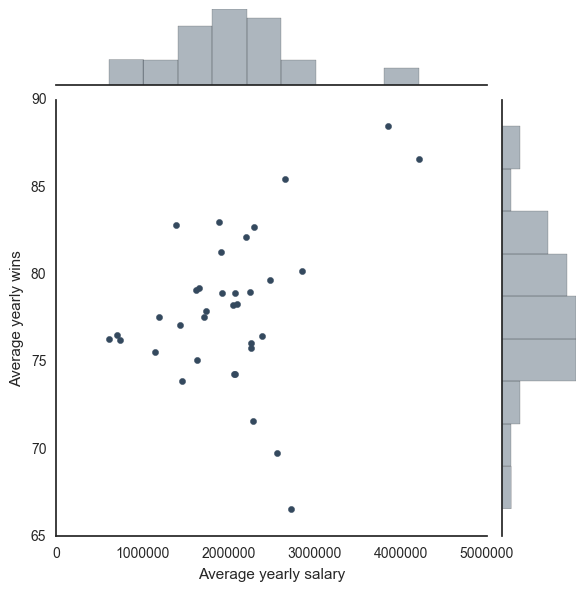

In [45]:
sns.jointplot(data=team_stats, x='salary', y='W', color="#34495e", \
              xlim=(0,5000000), stat_func=None).set_axis_labels("Average yearly salary","Average yearly wins")

In [11]:
# Compute the correlation matrix
corr = team_stats.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

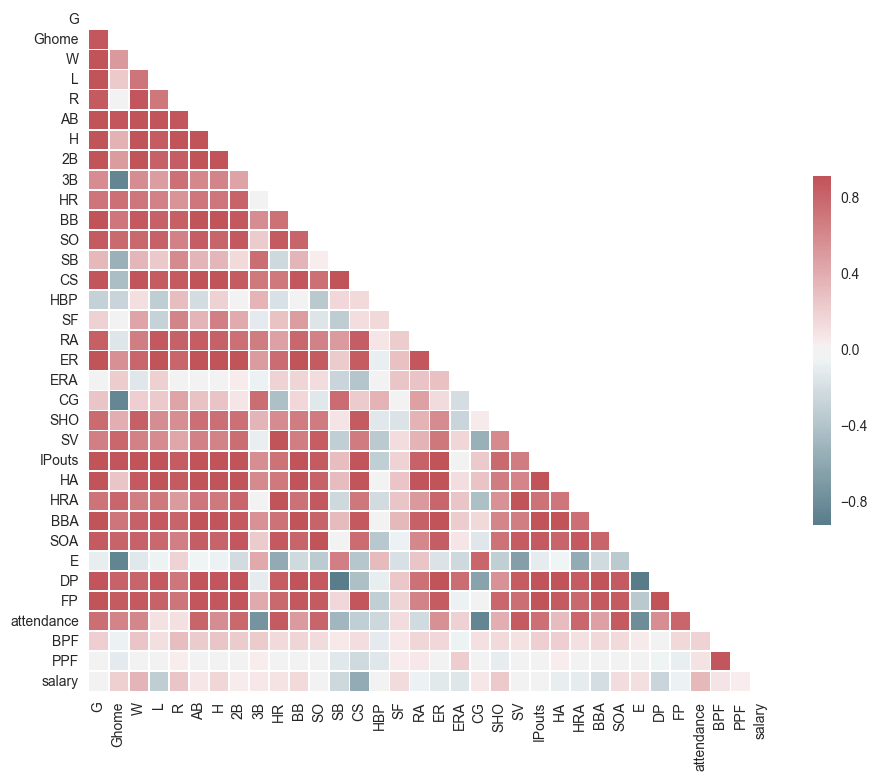

In [81]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, s=50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [76]:
offence = ['R','AB','H','2B','3B','HR','BB','SB','HBP', 'SF']
defence = ['SO','CS','RA','ER','ERA','CG','SHO','SV','IPouts','HA','BBA','SOA','E','DP','FP']

In [80]:
corr.loc[offence + ['W']].sort_values(by='W', ascending=False)['W'].head(10)

W    1.00
H    0.95
AB   0.94
2B   0.93
R    0.90
BB   0.88
HR   0.71
3B   0.58
SF   0.45
SB   0.35
Name: W, dtype: float64

In [93]:
corr.loc[defence + ['W']].sort_values(by='W', ascending=False)['W'].head(10)

W        1.00
IPouts   0.94
CS       0.90
FP       0.87
HA       0.87
SHO      0.84
BBA      0.84
SOA      0.83
DP       0.81
ER       0.81
Name: W, dtype: float64

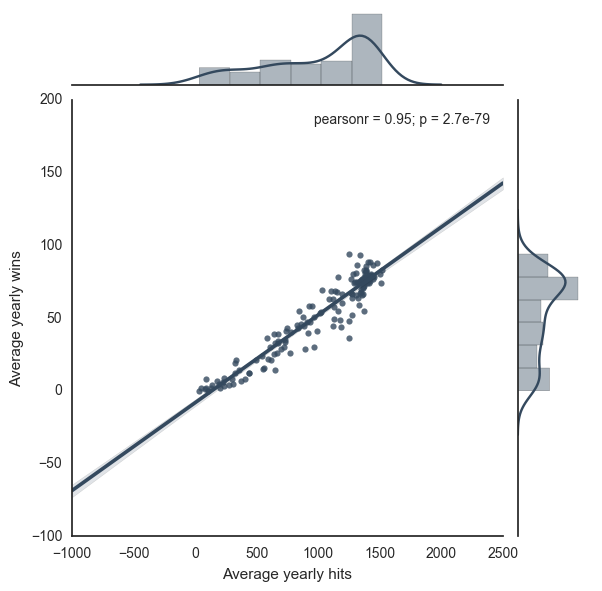

In [47]:
p1 = sns.jointplot(data=team_stats, x='H', y='W', kind='reg', \
                   color="#34495e").set_axis_labels("Average yearly hits","Average yearly wins")

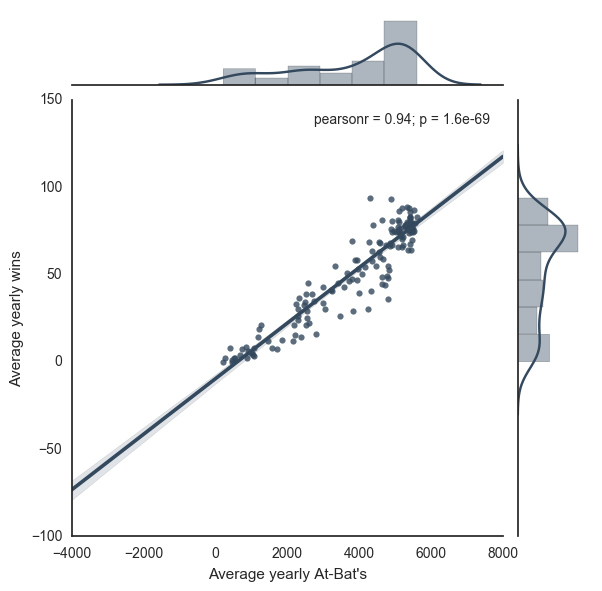

In [48]:
p2 = sns.jointplot(data=team_stats, x='AB', y='W', kind='reg', \
                   color="#34495e").set_axis_labels("Average yearly At-Bat's","Average yearly wins")

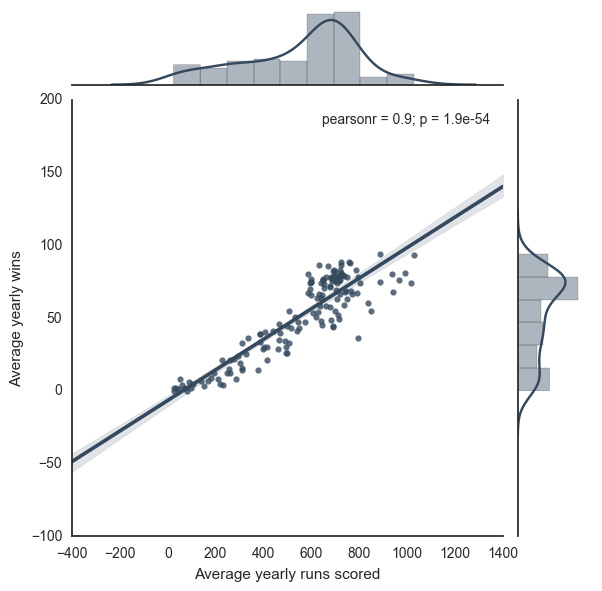

In [49]:
p3 = sns.jointplot(data=team_stats, x='R', y='W', kind='reg', \
                   color="#34495e").set_axis_labels("Average yearly runs scored","Average yearly wins")